In [53]:
# DFT
import cv2
import matplotlib.pyplot as plt
import numpy as np


img = cv2.imread('task2_sample.png', cv2.IMREAD_GRAYSCALE)

print(img)

# spectrum visualization

f_img = np.fft.fft2(img)
img = np.fft.ifft2(f_img)

print(np.abs(img))



[[169 169 168 ... 175 162 138]
 [169 169 168 ... 175 162 138]
 [169 169 168 ... 175 162 138]
 ...
 [ 53  53  59 ... 115 112 114]
 [ 53  53  64 ... 117 118 122]
 [ 53  53  64 ... 117 118 122]]
[[169. 169. 168. ... 175. 162. 138.]
 [169. 169. 168. ... 175. 162. 138.]
 [169. 169. 168. ... 175. 162. 138.]
 ...
 [ 53.  53.  59. ... 115. 112. 114.]
 [ 53.  53.  64. ... 117. 118. 122.]
 [ 53.  53.  64. ... 117. 118. 122.]]


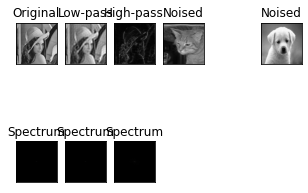

In [16]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

##### To-do #####



def fm_spectrum(img):
    complexes = np.fft.fft2(img)

    # 복소수 배열이어야 똑같이 복소수(complex한 형)를 넣을때 오차가 발생하지 않는다.
    new_boksosu = complexes.copy()

    w, h = img.shape

    # gather to the center
    for i in range(w):
        for j in range(h):
            if i < w/2 and j < h/2:
                new_boksosu[i][j] = complexes[i+int(w/2)][j + int(h/2)]
            
            if i >= w/2 and j < h/2:
                new_boksosu[i][j] = complexes[i - int(w/2)][j + int(h/2)]

            if i < w/2 and j >= h/2:
                new_boksosu[i][j] = complexes[i + int(w/2)][j - int(h/2)]

            if i >= w/2 and j >= h/2:
                new_boksosu[i][j] = complexes[i - int(w/2)][j - int(h/2)]

    # because the number is too small now.
    img = np.log(np.abs(new_boksosu))
    
    return img



def low_pass_filter(img, th=20):

    complexes = np.fft.fft2(img)

    new_complexes = complexes.copy()

    w, h = img.shape

    for i in range(w):
        for j in range(h):
            if i < w/2 and j < h/2:
                new_complexes[i][j] = complexes[i+int(w/2)][j + int(h/2)]
            if i >= w/2 and j < h/2:
                new_complexes[i][j] = complexes[i - int(w/2)][j + int(h/2)]

            if i < w/2 and j >= h/2:
                new_complexes[i][j] = complexes[i + int(w/2)][j - int(h/2)]

            if i >= w/2 and j >= h/2:
                new_complexes[i][j] = complexes[i - int(w/2)][j - int(h/2)]

    # gather to the center but do not apply abs and log.

    copy_Fspectrum = new_complexes.copy()

    ne = np.zeros(new_complexes.shape, dtype='complex_')

    k = new_complexes.shape[0]/2
    l = new_complexes.shape[1]/2

    for a in range(new_complexes.shape[0]):
        for b in range(new_complexes.shape[1]):
            if np.sqrt((k-a)**2 + (l-b)**2) >= th:
                # calculate distance from the center.
                copy_Fspectrum[a][b] = copy_Fspectrum[a][b]*0

    
    ne = np.fft.ifft2(copy_Fspectrum)
    
    #  ne = np.abs(ne).astype(np.uint8)
    ne = np.abs(ne).astype(np.uint8)
    
    return ne


def high_pass_filter(img, th=30):
    
    boksosu = np.fft.fft2(img)
    
    
    ## fftshfit를 직접 구현.
    new_boksosu = boksosu.copy() # 복소수 배열이어야 똑같이 복소수(complex한 형)를 넣을때 오차가 발생하지 않는다.

    w, h = img.shape

    for i in range(w):
        for j in range(h):
            if i < w/2 and j < h/2:
                new_boksosu[i][j] = boksosu[i+int(w/2)][j + int(h/2)]
            if i >= w/2 and j < h/2:
                new_boksosu[i][j] = boksosu[i - int(w/2)][j + int(h/2)]

            if i < w/2 and j >= h/2:
                new_boksosu[i][j] = boksosu[i + int(w/2)][j - int(h/2)]

            if i >= w/2 and j >= h/2:
                new_boksosu[i][j] = boksosu[i - int(w/2)][j - int(h/2)]

    # 중앙으로 모아줬다. log와 절댓값은 취해주지 않음.
    
    fss = new_boksosu.copy()
    copy_Fspectrum = new_boksosu.copy()
    
    
    ne = np.zeros(fss.shape, dtype = 'complex_')
    
    # or use gaussian kernel
    
    k = fss.shape[0]/2
    l = fss.shape[1]/2

    ## filter적용
    for a in range(fss.shape[0]):
        for b in range(fss.shape[1]):
            if np.sqrt((k-a)**2 + (l-b)**2) <= th:
                copy_Fspectrum[a][b] = ne[1][1] # 0의 복소수 형태

    # 다시 퍼뜨려줬다.
    
    
    ne = np.fft.ifft2(copy_Fspectrum)
    ne = np.abs(ne)
    
    return ne


def denoise1(img):
    
    freq_domain = fm_spectrum(img)
    
    
    boksosu = np.fft.fft2(img)
    
    
    ## fftshfit를 직접 구현.
    new_boksosu = boksosu.copy() # 복소수 배열이어야 똑같이 복소수(complex한 형)를 넣을때 오차가 발생하지 않는다.

    
    ne = np.zeros(img.shape, dtype = 'complex_')
    
    w, h = freq_domain.shape
    
    for i in range(w):
        for j in range(h):
            if freq_domain[i][j]>10:
                if not (i < 20 or i > 490) :
                    new_boksosu[i][j]=ne[1][1]
    
    
    img = np.fft.ifft2(new_boksosu).astype(np.float64)
    #    img = np.abs(img)

    
    return img


def denoise2(img):
    
    boksosu = np.fft.fft2(img)
    img = np.fft.ifft2(boksosu)
    
    return img

#################


if __name__ == '__main__':
    img = cv2.imread('task2_sample.png', cv2.IMREAD_GRAYSCALE)
    cor1 = cv2.imread('task2_corrupted_1.png', cv2.IMREAD_GRAYSCALE)
    cor2 = cv2.imread('task2_corrupted_2.png', cv2.IMREAD_GRAYSCALE)

    def drawFigure(loc, img, label):
        plt.subplot(*loc), plt.imshow(img, cmap='gray')
        plt.title(label), plt.xticks([]), plt.yticks([])

    drawFigure((2, 7, 1), img, 'Original')
    drawFigure((2,7,2), low_pass_filter(img), 'Low-pass')
    drawFigure((2,7,3), high_pass_filter(img), 'High-pass')
    drawFigure((2,7,4), cor1, 'Noised')
    
#    drawFigure((2,7,5), denoise1(cor1), 'Denoised')
    
    drawFigure((2,7,6), cor2, 'Noised')
#    drawFigure((2,7,7), denoise2(cor2), 'Denoised')

    drawFigure((2,7,8), fm_spectrum(img), 'Spectrum')
    drawFigure((2,7,9), fm_spectrum(low_pass_filter(img)), 'Spectrum')
    drawFigure((2,7,10), fm_spectrum(high_pass_filter(img)), 'Spectrum')
#    drawFigure((2,7,11), fm_spectrum(cor1), 'Spectrum')
    
#    drawFigure((2,7,12), fm_spectrum(denoise1(cor1)), 'Spectrum')
    
#    drawFigure((2,7,13), fm_spectrum(cor2), 'Spectrum')
#    drawFigure((2,7,14), fm_spectrum(denoise2(cor2)), 'Spectrum')

    plt.show()


In [124]:

import math
from mpl_toolkits.mplot3d import Axes3D

img = cv2.imread('task2_sample.png', cv2.IMREAD_GRAYSCALE)

    
boksosu = np.fft.fft2(img)
shift_first = np.fft.fftshift(boksosu)
fs = np.log(np.abs(shift_first))


rad = np.linspace(-fs.shape[0],fs.shape[0],512) # 범위가 1) by 2) 사이즈가 된다. 3)칸으로 나눈다.
a,b = np.meshgrid(rad, rad) 

ddddd=0

# for a in range(fs.shape[0]):
#     for b in range(fs.shape[1]):
#         if np.sqrt(a**2 + b**2) >= 20:
#             fs[a][b] = 0

lf = np.ones(fs.shape)
k = lf.shape[0]/2
l = lf.shape[1]/2

for a in range(fs.shape[0]):
    for b in range(fs.shape[1]):
        if np.sqrt((k-a)**2 + (l-b)**2) >= 20:
            lf[a][b] = 0
            
print(lf)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


[[169 169 168 ... 175 162 138]
 [169 169 168 ... 175 162 138]
 [169 169 168 ... 175 162 138]
 ...
 [ 53  53  59 ... 115 112 114]
 [ 53  53  64 ... 117 118 122]
 [ 53  53  64 ... 117 118 122]]
---------------------


<class 'numpy.complex128'>


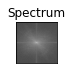

In [125]:

img = cv2.imread('task2_sample.png', cv2.IMREAD_GRAYSCALE)
boksosu = np.fft.fft2(img)

## 함수써서 이동
shift_by_func = np.fft.fftshift(boksosu)

F_spectrum = np.log(np.abs(shift_first))

new_boksosu = boksosu.copy()

w, h = img.shape

for i in range(w):
    for j in range(h):
        if i < w/2 and j < h/2:
            new_boksosu[i][j] = boksosu[i+int(w/2)][j + int(h/2)]
        if i >= w/2 and j < h/2:
            new_boksosu[i][j] = boksosu[i - int(w/2)][j + int(h/2)]
            
        if i < w/2 and j >= h/2:
            new_boksosu[i][j] = boksosu[i + int(w/2)][j - int(h/2)]
            
        if i >= w/2 and j >= h/2:
            new_boksosu[i][j] = boksosu[i - int(w/2)][j - int(h/2)]
            
print(img)
print("---------------------\n\n")
print(type(new_boksosu[0][0]))
            
            

def fm_spectrum2(img):
    
    boksosu = np.fft.fft2(img)
    
    ## shift함수 써서 이동. 비교용
    shift_first = np.fft.fftshift(boksosu)
    
    ## 직접 이동.
    w, h = img.shape
    
    new_boksosu = boksosu.copy()
    
    for i in range(w):
        for j in range(h):
            if i < w/2 and j < h/2:
                new_boksosu[i][j] = boksosu[i+int(w/2)][j+int(h/2)]
            if i >= w/2 and j < h/2:
                new_boksosu[i][j] = boksosu[i-int(w/2)][j+int(h/2)]

            if i < w/2 and j >= h/2:
                new_boksosu[i][j] = boksosu[i+int(w/2)][j-int(h/2)]

            if i >= w/2 and j >= h/2:
                new_boksosu[i][j] = boksosu[i-int(w/2)][j-int(h/2)]

            
    F_spectrum = np.log(np.abs(new_boksosu))
    
    img2 = F_spectrum
    
    return img2


def fm_spectrum1(img):
    
    boksosu = np.fft.fft2(img)
    
    ## shift함수 써서 이동. 비교용
    shift_first = np.fft.fftshift(boksosu)
    
            
    F_spectrum = np.log(np.abs(shift_first))
    
    img = F_spectrum
    
    return img



def drawFigure(loc, img, label):
    plt.subplot(*loc), plt.imshow(img, cmap='gray')
    plt.title(label), plt.xticks([]), plt.yticks([])



drawFigure((2,7,8), fm_spectrum2(img), 'Spectrum')



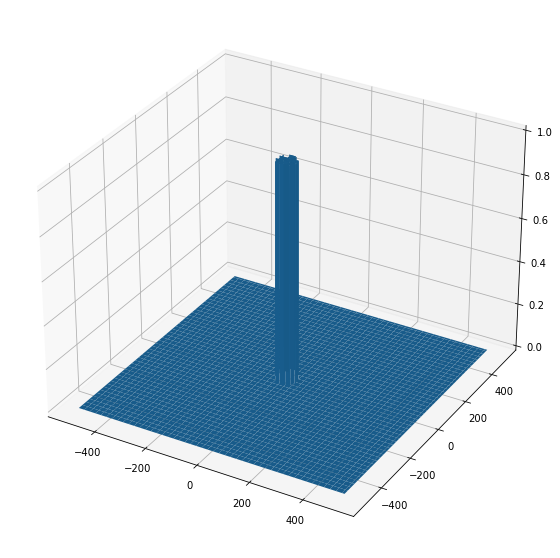

In [126]:
import math
from mpl_toolkits.mplot3d import Axes3D

kernel_size = 5
rad = np.linspace(-512,512,512) # 범위가 1) by 2) 사이즈가 된다. 3)칸으로 나눈다.
a,b = np.meshgrid(rad, rad) 



plt.figure(figsize = (10,10))
ax = plt.subplot(1,1,1,projection = '3d')
ax.plot_surface(a,b,lf)
plt.show()


In [127]:

img = cv2.imread('task2_sample.png', cv2.IMREAD_GRAYSCALE)
boksosu = np.fft.fft2(img)

## 함수써서 이동
shift_by_func = np.fft.fftshift(boksosu)

F_spectrum = np.log(np.abs(shift_first))

new_boksosu = boksosu.copy()

w, h = img.shape

for i in range(w):
    for j in range(h):
        if i < w/2 and j < h/2:
            new_boksosu[i][j] = boksosu[i+int(w/2)][j + int(h/2)]
        if i >= w/2 and j < h/2:
            new_boksosu[i][j] = boksosu[i - int(w/2)][j + int(h/2)]
            
        if i < w/2 and j >= h/2:
            new_boksosu[i][j] = boksosu[i + int(w/2)][j - int(h/2)]
            
        if i >= w/2 and j >= h/2:
            new_boksosu[i][j] = boksosu[i - int(w/2)][j - int(h/2)]
            
print(img)
print("---------------------\n\n")
print(type(new_boksosu[0][0]))
            

[[169 169 168 ... 175 162 138]
 [169 169 168 ... 175 162 138]
 [169 169 168 ... 175 162 138]
 ...
 [ 53  53  59 ... 115 112 114]
 [ 53  53  64 ... 117 118 122]
 [ 53  53  64 ... 117 118 122]]
---------------------


<class 'numpy.complex128'>


In [128]:


img = cv2.imread('task2_sample.png', cv2.IMREAD_GRAYSCALE)
print(type(img[2][2]))

<class 'numpy.uint8'>


(-8169.516075895996+9296.181501622345j)
하이패스 후 프리퀀시 6.127613245220217
(-8169.516075895996+9296.181501622345j)
하이패스 후 프리퀀시 5.09623447871487


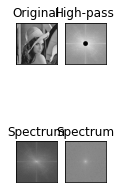

In [165]:
## 이걸 쓰면 프리퀀시 도메인 중앙에 모인걸로 출력된다.
def high_pass_filter(img, th=30):
    
    boksosu = np.fft.fft2(img)
    
    ## fftshfit를 직접 구현.
    new_boksosu = boksosu.copy() # 복소수 배열이어야 똑같이 복소수(complex한 형)를 넣을때 오차가 발생하지 않는다.

    w, h = img.shape

    for i in range(w):
        for j in range(h):
            if i < w/2 and j < h/2:
                new_boksosu[i][j] = boksosu[i+int(w/2)][j + int(h/2)]
            if i >= w/2 and j < h/2:
                new_boksosu[i][j] = boksosu[i - int(w/2)][j + int(h/2)]

            if i < w/2 and j >= h/2:
                new_boksosu[i][j] = boksosu[i + int(w/2)][j - int(h/2)]

            if i >= w/2 and j >= h/2:
                new_boksosu[i][j] = boksosu[i - int(w/2)][j - int(h/2)]

    # 중앙으로 모아줬다. log와 절댓값은 취해주지 않음.
    
    
    copy_Fspectrum = new_boksosu.copy()
    
    
    ne = np.zeros(copy_Fspectrum.shape, dtype = 'complex_')
    
    # or use gaussian kernel
    k = copy_Fspectrum.shape[0]/2
    l = copy_Fspectrum.shape[1]/2

    
    ## filter적용
    for a in range(copy_Fspectrum.shape[0]):
        for b in range(copy_Fspectrum.shape[1]):
            if np.sqrt((k-a)**2 + (l-b)**2) <= th:
                copy_Fspectrum[a][b] = 0.           +1.j   # 0의 복소수 형태
                
    
    ne2 = np.log(np.abs(copy_Fspectrum))
    
    ## 다시 퍼뜨려준다.
    for i in range(w):
        for j in range(h):
            if i < w/2 and j < h/2:
                new_boksosu[i][j] = copy_Fspectrum[i+int(w/2)][j + int(h/2)]
            if i >= w/2 and j < h/2:
                new_boksosu[i][j] = copy_Fspectrum[i - int(w/2)][j + int(h/2)]
            if i < w/2 and j >= h/2:
                new_boksosu[i][j] = copy_Fspectrum[i + int(w/2)][j - int(h/2)]
            if i >= w/2 and j >= h/2:
                new_boksosu[i][j] = copy_Fspectrum[i - int(w/2)][j - int(h/2)]

    # 다시 퍼뜨려줬다.
    
    print(new_boksosu[50][50])
    
    ne1 = np.abs(np.fft.ifft2(new_boksosu))
    
    
    return ne2


img = cv2.imread('task2_sample.png', cv2.IMREAD_GRAYSCALE)
cor1 = cv2.imread('task2_corrupted_1.png', cv2.IMREAD_GRAYSCALE)
cor2 = cv2.imread('task2_corrupted_2.png', cv2.IMREAD_GRAYSCALE)

def drawFigure(loc, img, label):
    plt.subplot(*loc), plt.imshow(img, cmap='gray')
    plt.title(label), plt.xticks([]), plt.yticks([])

drawFigure((2, 7, 1), img, 'Original')
drawFigure((2,7,2), high_pass_filter(img), 'High-pass')

drawFigure((2,7,8), fm_spectrum(img), 'Spectrum')
drawFigure((2,7,9), fm_spectrum(high_pass_filter(img)), 'Spectrum')

(-0+0j)
(-17.006128528431944+1.4470675852248382j)
(-9.094947017729282e-12-1.645350522494482e-13j)


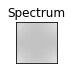

In [121]:

    boksosu = np.fft.fft2(img)
    
    ## fftshfit를 직접 구현.
    new_boksosu = boksosu.copy() # 복소수 배열이어야 똑같이 복소수(complex한 형)를 넣을때 오차가 발생하지 않는다.

    w, h = img.shape
    
    
    copy_Fspectrum = new_boksosu.copy()
    
    
    ne = np.zeros(copy_Fspectrum.shape, dtype = 'complex_')
    
    # or use gaussian kernel
    k = copy_Fspectrum.shape[0]/2
    l = copy_Fspectrum.shape[1]/2

    
    ## filter적용
    for a in range(copy_Fspectrum.shape[0]):
        for b in range(copy_Fspectrum.shape[1]):
            if np.sqrt((k-a)**2 + (l-b)**2) <= th:
                copy_Fspectrum[a][b] = 0.           +1.j   # 0의 복소수 형태
                
    
    ne2 = np.log(np.abs(copy_Fspectrum))
    
    
    print(new_boksosu[50][50])
    
    ne1 = np.abs(np.fft.ifft2(new_boksosu))

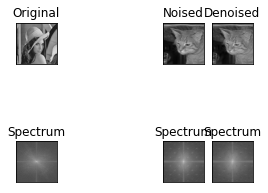

In [197]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

##### To-do #####


def fm_spectrum(img):
    boksosu = np.fft.fft2(img)
    
    ## shift함수 써서 이동. 비교용
    shift_first = np.fft.fftshift(boksosu)
    
    ## fftshfit를 직접 구현.
    new_boksosu = boksosu.copy() # 복소수 배열이어야 똑같이 복소수(complex한 형)를 넣을때 오차가 발생하지 않는다.

    w, h = img.shape

    for i in range(w):
        for j in range(h):
            if i < w/2 and j < h/2:
                new_boksosu[i][j] = boksosu[i+int(w/2)][j + int(h/2)]
            if i >= w/2 and j < h/2:
                new_boksosu[i][j] = boksosu[i - int(w/2)][j + int(h/2)]

            if i < w/2 and j >= h/2:
                new_boksosu[i][j] = boksosu[i + int(w/2)][j - int(h/2)]

            if i >= w/2 and j >= h/2:
                new_boksosu[i][j] = boksosu[i - int(w/2)][j - int(h/2)]
                
    
    F_spectrum = np.log(np.abs(new_boksosu))
    
    img = F_spectrum
    
    return img


def denoise1(img):
    
    freq_domain = np.fft.fft2(img)
    
    ## fftshfit를 직접 구현.
    new_boksosu = freq_domain.copy() # 복소수 배열이어야 똑같이 복소수(complex한 형)를 넣을때 오차가 발생하지 않는다.

    w, h = img.shape
    
    copy_Fspectrum = new_boksosu.copy()
    
    ne = np.zeros(copy_Fspectrum.shape, dtype = 'complex_')
    
    # or use gaussian kernel
    k = copy_Fspectrum.shape[0]/2
    l = copy_Fspectrum.shape[1]/2

    
    ## filter적용
    for a in range(copy_Fspectrum.shape[0]):
        for b in range(copy_Fspectrum.shape[1]):
            for i in range(6):
                for k in range(6):
                    if 45+100*i<a<64+101*i and 45+101*k < b < 64+101*k :
                        copy_Fspectrum[a][b] = copy_Fspectrum[a][b-4]
                    if 97+100*i<a<117+101*i and 97+101*k < b < 117+101*k :
                        copy_Fspectrum[a][b] = copy_Fspectrum[a][b-4]
                        
#                         copy_Fspectrum[a][b] = 0.           +1.j   # 0의 복소수 형태
                

    
#     for i in range(w):
#         for j in range(h):
#             if i < w/2 and j < h/2:
#                 new_boksosu[i][j] = copy_Fspectrum[i+int(w/2)][j + int(h/2)]
#             if i >= w/2 and j < h/2:
#                 new_boksosu[i][j] = copy_Fspectrum[i - int(w/2)][j + int(h/2)]

#             if i < w/2 and j >= h/2:
#                 new_boksosu[i][j] = copy_Fspectrum[i + int(w/2)][j - int(h/2)]

#             if i >= w/2 and j >= h/2:
#                 new_boksosu[i][j] = copy_Fspectrum[i - int(w/2)][j - int(h/2)]
                
    ne2 = np.log(np.abs(copy_Fspectrum))
    
    
    ne1 = np.abs(np.fft.ifft2(copy_Fspectrum))
    
    return ne1


def denoise2(img):
    
    boksosu = np.fft.fft2(img)
    img = np.fft.ifft2(boksosu)
    
    return img

#################


if __name__ == '__main__':
    img = cv2.imread('task2_sample.png', cv2.IMREAD_GRAYSCALE)
    cor1 = cv2.imread('task2_corrupted_1.png', cv2.IMREAD_GRAYSCALE)
    cor2 = cv2.imread('task2_corrupted_2.png', cv2.IMREAD_GRAYSCALE)

    def drawFigure(loc, img, label):
        plt.subplot(*loc), plt.imshow(img, cmap='gray')
        plt.title(label), plt.xticks([]), plt.yticks([])

    drawFigure((2, 7, 1), img, 'Original')
    
    drawFigure((2,7,4), cor1, 'Noised')
    
    drawFigure((2,7,5), denoise1(cor1), 'Denoised')
    

    drawFigure((2,7,8), fm_spectrum(img), 'Spectrum')
    
    drawFigure((2,7,11), fm_spectrum(cor1), 'Spectrum')
    
    drawFigure((2,7,12), fm_spectrum(denoise1(cor1)), 'Spectrum')

    plt.show()


In [15]:

img = cv2.imread('task2_sample.png', cv2.IMREAD_GRAYSCALE)

boksosu = np.fft.fft2(img)

print(boksosu)

b = np.zeros(img.shape, dtype='complex')

w, h = img.shape
for i in range(w):
    for k in range(h):
        e = b[1][1]
        for x in range(w):
            for y in range(h):
                e += img[x][y]*np.exp(-2j * np.pi * (i*x/w + k*y/h) )

        b[i][k] = e/w*h
        
        print(b[i][k])

print(b)


        

[[ 3.47150210e+07      +0.j         -4.56574842e+05+2164544.56601674j
   1.52208185e+06-1188744.34545086j ... -2.74594442e+05 -541856.23885154j
   1.52208185e+06+1188744.34545086j -4.56574842e+05-2164544.56601674j]
 [ 3.03060258e+04-1254352.11868502j -1.65318041e+06+1443256.09933483j
  -1.03047308e+06 +295625.94086566j ...  5.81429005e+05 +694299.50189837j
  -3.23146799e+05 +530172.14398945j  8.28827982e+04 +747288.29705214j]
 [-3.71339693e+05 -259159.6100419j  -2.73455353e+05  -96560.84121478j
   5.98253549e+05 -417384.05377513j ...  3.25457890e+05 +837215.92343231j
  -6.41543938e+05 -139288.98145975j  7.12638499e+05  -45587.21465757j]
 ...
 [ 5.03855090e+05 -170439.65910213j  6.80178798e+05 +661056.25759734j
  -4.51446673e+05 -196345.92584117j ...  9.43802904e+05 +134035.4765524j
   1.56184977e+05 -704857.7166025j  -1.08837489e+05 +617483.84937095j]
 [-3.71339693e+05 +259159.6100419j   7.12638499e+05  +45587.21465757j
  -6.41543938e+05 +139288.98145975j ... -5.14121296e+05 -698288.44

KeyboardInterrupt: 

In [18]:

img = cv2.imread('task2_sample.png', cv2.IMREAD_GRAYSCALE)

boksosu = np.fft.fft2(img)

bobo = np.fft.ifft2(boksosu)

print(bobo)

b = np.zeros(img.shape, dtype='complex')

w, h = img.shape

print(w,h)

boksosu = boksosu
for x in range(w):
    for y in range(h):
        e = b[1][1]*0
        for u in range(w):
            for v in range(h):
                e += ( boksosu[u][v]*np.exp(2j * np.pi * (x*u/w + y*v/h) ) ) / (w*h)

        b[x][y] = e
        
        print(b[x][y])

print(b)


        

[[169.+1.19435711e-15j 169.+2.08999484e-14j 168.+5.85902854e-16j ...
  175.+1.40651379e-14j 162.+1.50192359e-14j 138.+1.00657330e-15j]
 [169.-1.57799121e-14j 169.-1.83880688e-15j 168.-1.41167460e-14j ...
  175.-3.71230824e-16j 162.+1.14040721e-14j 138.-7.55688914e-15j]
 [169.+1.54130181e-15j 169.+1.75831572e-14j 168.-8.04608116e-15j ...
  175.-3.62557206e-15j 162.+3.27862737e-15j 138.-4.84985316e-15j]
 ...
 [ 53.+2.12950724e-15j  53.+1.56401327e-14j  59.+1.95373231e-15j ...
  115.-1.37043155e-15j 112.+6.90766888e-15j 114.-4.19846449e-15j]
 [ 53.+2.42948023e-15j  53.+9.93649607e-15j  64.+1.02379043e-14j ...
  117.-1.75207071e-15j 118.+7.21991911e-15j 122.-8.59685587e-15j]
 [ 53.-1.14986146e-14j  53.-1.10328413e-14j  64.-1.37281679e-14j ...
  117.-1.43600409e-14j 118.+2.68882139e-15j 122.-2.14624325e-14j]]
512 512
(168.99999999999636-4.440892098500626e-14j)
(169.00000000000531-3.561595462997502e-13j)
(168.00000000000117+2.6911806116913795e-13j)
(167.0000000000032+5.089262344881718e-13j)


KeyboardInterrupt: 